# IMPORTANT

In [1]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

# Answers:

a) Assume you have two probability distributions that belong to the same family, and one of them comes from a learning model generated by the other, these distributions are called "Conjugate distributions". Furthermore, the one that acts as a generator is called the "Conjugate prior".

b) True

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    b) Using a Laplacian prior will lead to Lasso Regression

2) (True or False)  
    a) Ridge can often help with feature selection  
    b) Lasso can often help with feature selection

# Answers:

1) Using a Laplacian prior would lead to Lasso Regression

2) Lasso can help often with feature selection

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

# Answers:

1.a) Ridge Regression
1.b) Lasso Regression

2) Ridge Regression

3) Lasso Regression (some sort of feature selection)

4) Lambda = 0 would make Lasso and Ridge identical

5) Prior (training)

# Extracredit:

I would use Lasso, because with a high lambda it helps select the variable that is more relevant to the model.

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [2]:
import numpy as np
import math
import pylab as plt

%pylab inline

print "(Mean, Standard deviation):", "(",((2**-2)*(14*4+(2**-2*4)))/(((4**2)*(2**-2))+(2**-2)), ",", 1/np.sqrt((2**-2)+ (4**2)*(2**-2)), ")"

Populating the interactive namespace from numpy and matplotlib
(Mean, Standard deviation): ( 3.35294117647 , 0.485071250073 )


`%matplotlib` prevents importing * from pylab and numpy


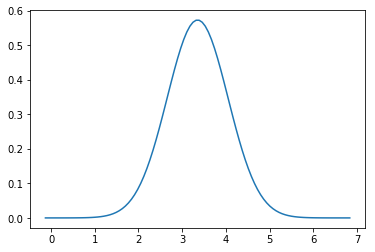

In [3]:
mu = 3.35294117647
variance = 0.485071250073
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

In [4]:
print "In a normal distribution with mean 3.3529 and std 0.48507 the probability of finding a w < 4 is 90.889%"

In a normal distribution with mean 3.3529 and std 0.48507 the probability of finding a w < 4 is 90.889%


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [5]:
## Learn to use numpy - Will be more useful in future
import pandas as pd
import numpy as np

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789,11.967305
3,33.424303,27.676937,4.533496,12.010908,-18.159244,4.777495,54.333856,31.886517,61.607712,6.907591,...,97.752102,0.751484,20.599931,95.431639,30.861203,22.548684,93.988541,12.820426,47.022745,15.988018
4,69.816320,61.489566,17.181358,24.093144,-35.745184,13.386441,122.288929,68.878098,128.452555,18.808763,...,70.996612,86.602438,98.127347,5.357836,87.865145,40.298166,86.488322,60.963969,84.368874,53.736157


In [7]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,24.614936,22.521951,2.197478,9.819148,-17.840580,4.038417,45.040223,27.920974,48.337288,5.541484,...,85.107110,28.738932,39.532761,28.256818,85.133257,71.739674,82.660726,26.841269,42.092646,18.274350
1,45.453889,38.598541,6.868511,15.599206,-24.764269,7.090872,78.266837,42.097695,81.749616,12.269276,...,92.923858,65.545650,5.055256,4.123023,45.566800,39.565349,22.327959,27.841619,7.512355,33.720500
2,91.053932,82.169235,20.268322,28.880727,-46.329589,18.357093,157.059847,89.339661,166.453834,24.663196,...,26.759732,46.254672,21.134454,7.632506,60.352286,1.957518,82.143760,54.083782,51.693172,66.401776
3,-0.328703,0.123033,-8.139047,0.984829,-2.246921,-1.955727,0.862675,3.789570,1.050826,-1.210761,...,16.139239,89.502163,67.420489,76.343227,57.400444,16.750873,6.927084,67.371692,79.108816,3.916050
4,46.831963,40.137370,7.027021,15.288582,-25.713243,9.302304,81.402224,49.019587,86.408130,13.022716,...,64.629393,97.141129,84.851024,45.952819,14.248448,82.044409,35.384527,43.914904,20.892924,50.547031


In [8]:
print data_train.shape
print data_test.shape

(30, 41)
(20, 41)


In [9]:
data_train.rename(columns = {'40':"Y"}, inplace = True)
data_train.rename(columns = {'0':"x1"}, inplace = True)
data_train.rename(columns = {'1':"x2"}, inplace = True)
data_train.rename(columns = {'2':"x3"}, inplace = True)
data_train.rename(columns = {'3':"x4"}, inplace = True)
data_train.rename(columns = {'4':"x5"}, inplace = True)
data_train.rename(columns = {'5':"x6"}, inplace = True)
data_train.rename(columns = {'6':"x7"}, inplace = True)
data_train.rename(columns = {'7':"x8"}, inplace = True)
data_train.rename(columns = {'8':"x9"}, inplace = True)
data_train.rename(columns = {'9':"x10"}, inplace = True)
data_train.rename(columns = {'10':"x11"}, inplace = True)
data_train.rename(columns = {'11':"x12"}, inplace = True)
data_train.rename(columns = {'12':"x13"}, inplace = True)
data_train.rename(columns = {'13':"x14"}, inplace = True)
data_train.rename(columns = {'14':"x15"}, inplace = True)
data_train.rename(columns = {'15':"x16"}, inplace = True)
data_train.rename(columns = {'16':"x17"}, inplace = True)
data_train.rename(columns = {'17':"x18"}, inplace = True)
data_train.rename(columns = {'18':"x19"}, inplace = True)
data_train.rename(columns = {'19':"x20"}, inplace = True)
data_train.rename(columns = {'20':"x21"}, inplace = True)
data_train.rename(columns = {'21':"x22"}, inplace = True)
data_train.rename(columns = {'22':"x23"}, inplace = True)
data_train.rename(columns = {'23':"x24"}, inplace = True)
data_train.rename(columns = {'24':"x25"}, inplace = True)
data_train.rename(columns = {'25':"x26"}, inplace = True)
data_train.rename(columns = {'26':"x27"}, inplace = True)
data_train.rename(columns = {'27':"x28"}, inplace = True)
data_train.rename(columns = {'28':"x29"}, inplace = True)
data_train.rename(columns = {'29':"x30"}, inplace = True)
data_train.rename(columns = {'30':"x31"}, inplace = True)
data_train.rename(columns = {'31':"x32"}, inplace = True)
data_train.rename(columns = {'32':"x33"}, inplace = True)
data_train.rename(columns = {'33':"x34"}, inplace = True)
data_train.rename(columns = {'34':"x35"}, inplace = True)
data_train.rename(columns = {'35':"x36"}, inplace = True)
data_train.rename(columns = {'36':"x37"}, inplace = True)
data_train.rename(columns = {'37':"x38"}, inplace = True)
data_train.rename(columns = {'38':"x39"}, inplace = True)
data_train.rename(columns = {'39':"x40"}, inplace = True)

data_test.rename(columns = {'40':"Y"}, inplace = True)
data_test.rename(columns = {'0':"x1"}, inplace = True)
data_test.rename(columns = {'1':"x2"}, inplace = True)
data_test.rename(columns = {'2':"x3"}, inplace = True)
data_test.rename(columns = {'3':"x4"}, inplace = True)
data_test.rename(columns = {'4':"x5"}, inplace = True)
data_test.rename(columns = {'5':"x6"}, inplace = True)
data_test.rename(columns = {'6':"x7"}, inplace = True)
data_test.rename(columns = {'7':"x8"}, inplace = True)
data_test.rename(columns = {'8':"x9"}, inplace = True)
data_test.rename(columns = {'9':"x10"}, inplace = True)
data_test.rename(columns = {'10':"x11"}, inplace = True)
data_test.rename(columns = {'11':"x12"}, inplace = True)
data_test.rename(columns = {'12':"x13"}, inplace = True)
data_test.rename(columns = {'13':"x14"}, inplace = True)
data_test.rename(columns = {'14':"x15"}, inplace = True)
data_test.rename(columns = {'15':"x16"}, inplace = True)
data_test.rename(columns = {'16':"x17"}, inplace = True)
data_test.rename(columns = {'17':"x18"}, inplace = True)
data_test.rename(columns = {'18':"x19"}, inplace = True)
data_test.rename(columns = {'19':"x20"}, inplace = True)
data_test.rename(columns = {'20':"x21"}, inplace = True)
data_test.rename(columns = {'21':"x22"}, inplace = True)
data_test.rename(columns = {'22':"x23"}, inplace = True)
data_test.rename(columns = {'23':"x24"}, inplace = True)
data_test.rename(columns = {'24':"x25"}, inplace = True)
data_test.rename(columns = {'25':"x26"}, inplace = True)
data_test.rename(columns = {'26':"x27"}, inplace = True)
data_test.rename(columns = {'27':"x28"}, inplace = True)
data_test.rename(columns = {'28':"x29"}, inplace = True)
data_test.rename(columns = {'29':"x30"}, inplace = True)
data_test.rename(columns = {'30':"x31"}, inplace = True)
data_test.rename(columns = {'31':"x32"}, inplace = True)
data_test.rename(columns = {'32':"x33"}, inplace = True)
data_test.rename(columns = {'33':"x34"}, inplace = True)
data_test.rename(columns = {'34':"x35"}, inplace = True)
data_test.rename(columns = {'35':"x36"}, inplace = True)
data_test.rename(columns = {'36':"x37"}, inplace = True)
data_test.rename(columns = {'37':"x38"}, inplace = True)
data_test.rename(columns = {'38':"x39"}, inplace = True)
data_test.rename(columns = {'39':"x40"}, inplace = True)

In [10]:
data_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,Y
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789,11.967305
3,33.424303,27.676937,4.533496,12.010908,-18.159244,4.777495,54.333856,31.886517,61.607712,6.907591,...,97.752102,0.751484,20.599931,95.431639,30.861203,22.548684,93.988541,12.820426,47.022745,15.988018
4,69.816320,61.489566,17.181358,24.093144,-35.745184,13.386441,122.288929,68.878098,128.452555,18.808763,...,70.996612,86.602438,98.127347,5.357836,87.865145,40.298166,86.488322,60.963969,84.368874,53.736157


In [11]:
import statsmodels.formula.api as smf


In [12]:
Regress = lambda feature: smf.ols(formula = 'Y ~ %s - 1'%feature, data = data_train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'Y'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [13]:
result = smf.ols(formula = 'Y ~ '+ '+'.join(data_train.columns[:-1]),data = data_train).fit()
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result))
print('Fitted coefficients:')
print result.params

In sample R-squared: 1.000000
Out of sample R-squared: -1.028031
Fitted coefficients:
Intercept   -0.022607
x1           2.309668
x2           4.714510
x3          -1.606173
x4          -0.952237
x5          -4.017605
x6          -0.237963
x7          -1.755886
x8          -2.151587
x9          -1.024788
x10         -0.479281
x11          2.363082
x12          1.222896
x13         -0.547845
x14          1.570676
x15         -1.582059
x16         -2.189021
x17         -2.252427
x18         -2.252290
x19          0.082855
x20         -2.078163
x21          1.494662
x22          0.215336
x23          0.058821
x24          0.116275
x25          0.181060
x26          0.079988
x27          0.078709
x28         -0.268607
x29         -0.134959
x30         -0.005563
x31         -0.030106
x32         -0.024292
x33          0.135991
x34         -0.016121
x35         -0.154977
x36         -0.137389
x37         -0.334634
x38          0.017891
x39         -0.141545
x40         -0.036958
dtype: float

OLS reached perfect in sample R squared over the training set because we have more regressors than observations. Nonetheless it's generalizeability is poor (the out of sample R2 is below zero). Which means there is an overfitting problem.

# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [14]:
X_train = data_train.iloc[:,:40]

y_train = data_train.iloc[:,40:]

X_test = data_train.iloc[:,:40]

y_test = data_train.iloc[:,40:]

In [15]:
from sklearn import linear_model

Ridge=linear_model.Ridge(fit_intercept=False, alpha=3000) 
#try Ridge with an arbitrary regularization parameter lambda=3000

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: Y    0.918346
dtype: float64
The R-squared we found for OS Ridge is: Y    0.918346
dtype: float64


In [16]:
Lasso=linear_model.Lasso(fit_intercept=False,alpha=30)
#try Ridge with a selected regularization parameter lambda = 30

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train.T

R_2_IS_Lasso=1-np.var(err_IS.T)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))

#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test.T
R_2_OS_Lasso=1-np.var(err_OS.T)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))


The R-squared we found for IS Lasso is: Y    0.883356
dtype: float64
The R-squared we found for OS Lasso is: Y    0.883356
dtype: float64


/opt/rh/anaconda/root/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Interpretation:

Both Ridge and Lasso work very well for both lambdas. Specially fixing the Overfitting problem. In this particular case Ridge seems to give us a higher R Square.

# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


In [17]:
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
type(X_train.iloc[0,0])

numpy.float64

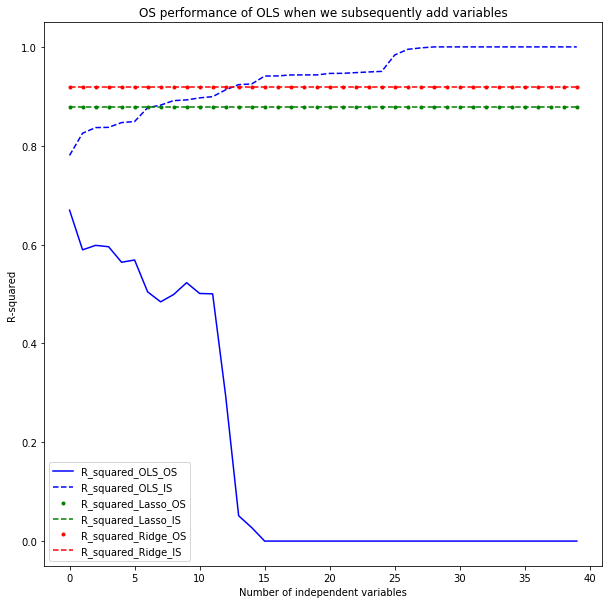

In [19]:
Number_variables=range(len(data_train.columns[:-1]))
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]

R2_IS_Lasso=[]
R2_OS_Lasso=[]

R2_IS_Ridge=[]
R2_OS_Ridge=[]

for i in Number_variables:
    
    lm = smf.ols(formula = 'Y ~ '+ '+'.join(data_train.columns[:i+1]), data = data_train).fit()
    R2 = modelEval(lm)
    OLS_R_2_IS_F.append(lm.rsquared)
    OLS_R_2_OS_F.append(R2 if R2 > 0 else 0)
    
for i in Number_variables:
    
    Lasso=linear_model.Lasso(fit_intercept=True,alpha=30, )
    Lasso.fit(X_train,y_train)
    
    p_IS=Lasso.predict(X_train)
    err_IS=p_IS-y_train.T
    R2_IS_Lasso.append(1-np.var(err_IS.T)/np.var(y_train))
    
    p_OS=Lasso.predict(X_test)
    err_OS=p_OS-y_test.T
    R2_OS_Lasso.append(1-np.var(err_OS.T)/np.var(y_test))
    
    
for i in Number_variables:
    
    Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
    Ridge.fit(X_train,y_train)
    
    p_OS=Ridge.predict(X_test)
    err_OS=p_OS-y_test
    R2_OS_Ridge.append(1-np.var(err_OS)/np.var(y_test))
    
    p_IS=Ridge.predict(X_train)
    err_IS=p_IS-y_train
    R2_IS_Ridge.append(1-np.var(err_IS)/np.var(y_train))
    
figure(figsize=(10,10))
plt.title('OS performance of OLS when we subsequently add variables')
plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
plt.plot(Number_variables,OLS_R_2_IS_F,'b--',label='R_squared_OLS_IS')
plt.plot(Number_variables,R2_OS_Lasso,'g.',label='R_squared_Lasso_OS')
plt.plot(Number_variables,R2_IS_Lasso,'g--',label='R_squared_Lasso_IS')
plt.plot(Number_variables,R2_OS_Ridge,'r.',label='R_squared_Ridge_OS')
plt.plot(Number_variables,R2_IS_Ridge,'r--',label='R_squared_Ridge_IS')
plt.legend(loc='lower left')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [20]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.3, random_state = 10)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.ix[:,:-1],
                                    data_train.ix[:,-1], test_size = 0.3, random_state = 10)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


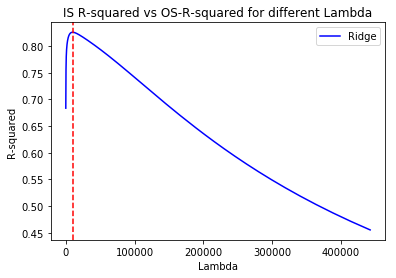

Optimal lambda for Ridge=10007.1516001


In [22]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(0,13,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.3,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

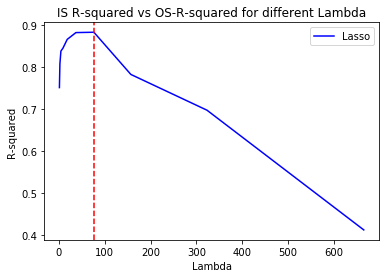

Optimal lambda for Lasso=76.197856573


In [23]:
#select lambdas for Lasso 
lambdas=np.exp(np.linspace(0,6.5,10))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.3,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))